## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP TASK


## IMPLEMENTATION OF DECISION TREE ALGORITHM

OBJECTIVE:
To predict a new dataset into right classification accordingly by Creating the Decision Tree classifier and visualize it graphically.

In [12]:
import pandas as pd
import numpy as np
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=data('iris')

In [14]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [15]:
df.Species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

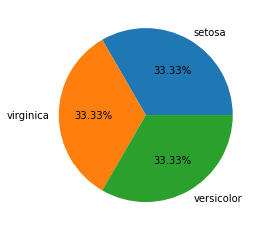

In [16]:
plt.pie(df['Species'].value_counts(),autopct="%2.2f%%",labels=['setosa','virginica','versicolor']);

In [17]:
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [19]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
df.isna().sum()/len(df)*100

Sepal.Length    0.0
Sepal.Width     0.0
Petal.Length    0.0
Petal.Width     0.0
Species         0.0
dtype: float64

### Preparing the data

Now, To create the dependent and independent variables from the data.

In [21]:
x=df.iloc[:,:4]

In [22]:
y=df.iloc[:,-1]

In [23]:
print(x.head())
print(y.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
1           5.1          3.5           1.4          0.2
2           4.9          3.0           1.4          0.2
3           4.7          3.2           1.3          0.2
4           4.6          3.1           1.5          0.2
5           5.0          3.6           1.4          0.2
1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
Name: Species, dtype: object


Using Scikit-Learn's method to create training and testing data sets.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

### Training the Algorithm

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

In [27]:
clf=DecisionTreeClassifier(random_state=0)

In [28]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(random_state=0)

In [29]:
pred_test=clf.predict(test_x)
pred_train=clf.predict(train_x)

### Evaluation of the model

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(train_y,pred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       1.00      1.00      1.00        32
   virginica       1.00      1.00      1.00        39

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [32]:
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Predictions

In [33]:
pred_y=clf.predict(test_x)
DT = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})  
DT

,Actual,Predicted
115,virginica,virginica
63,versicolor,versicolor
34,setosa,setosa
108,virginica,virginica
8,setosa,setosa
101,virginica,virginica
41,setosa,setosa
87,versicolor,versicolor
77,versicolor,versicolor
72,versicolor,versicolor


###  Building Decision Tree



In [39]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import collections
import graphviz
from subprocess import call
from sklearn import tree

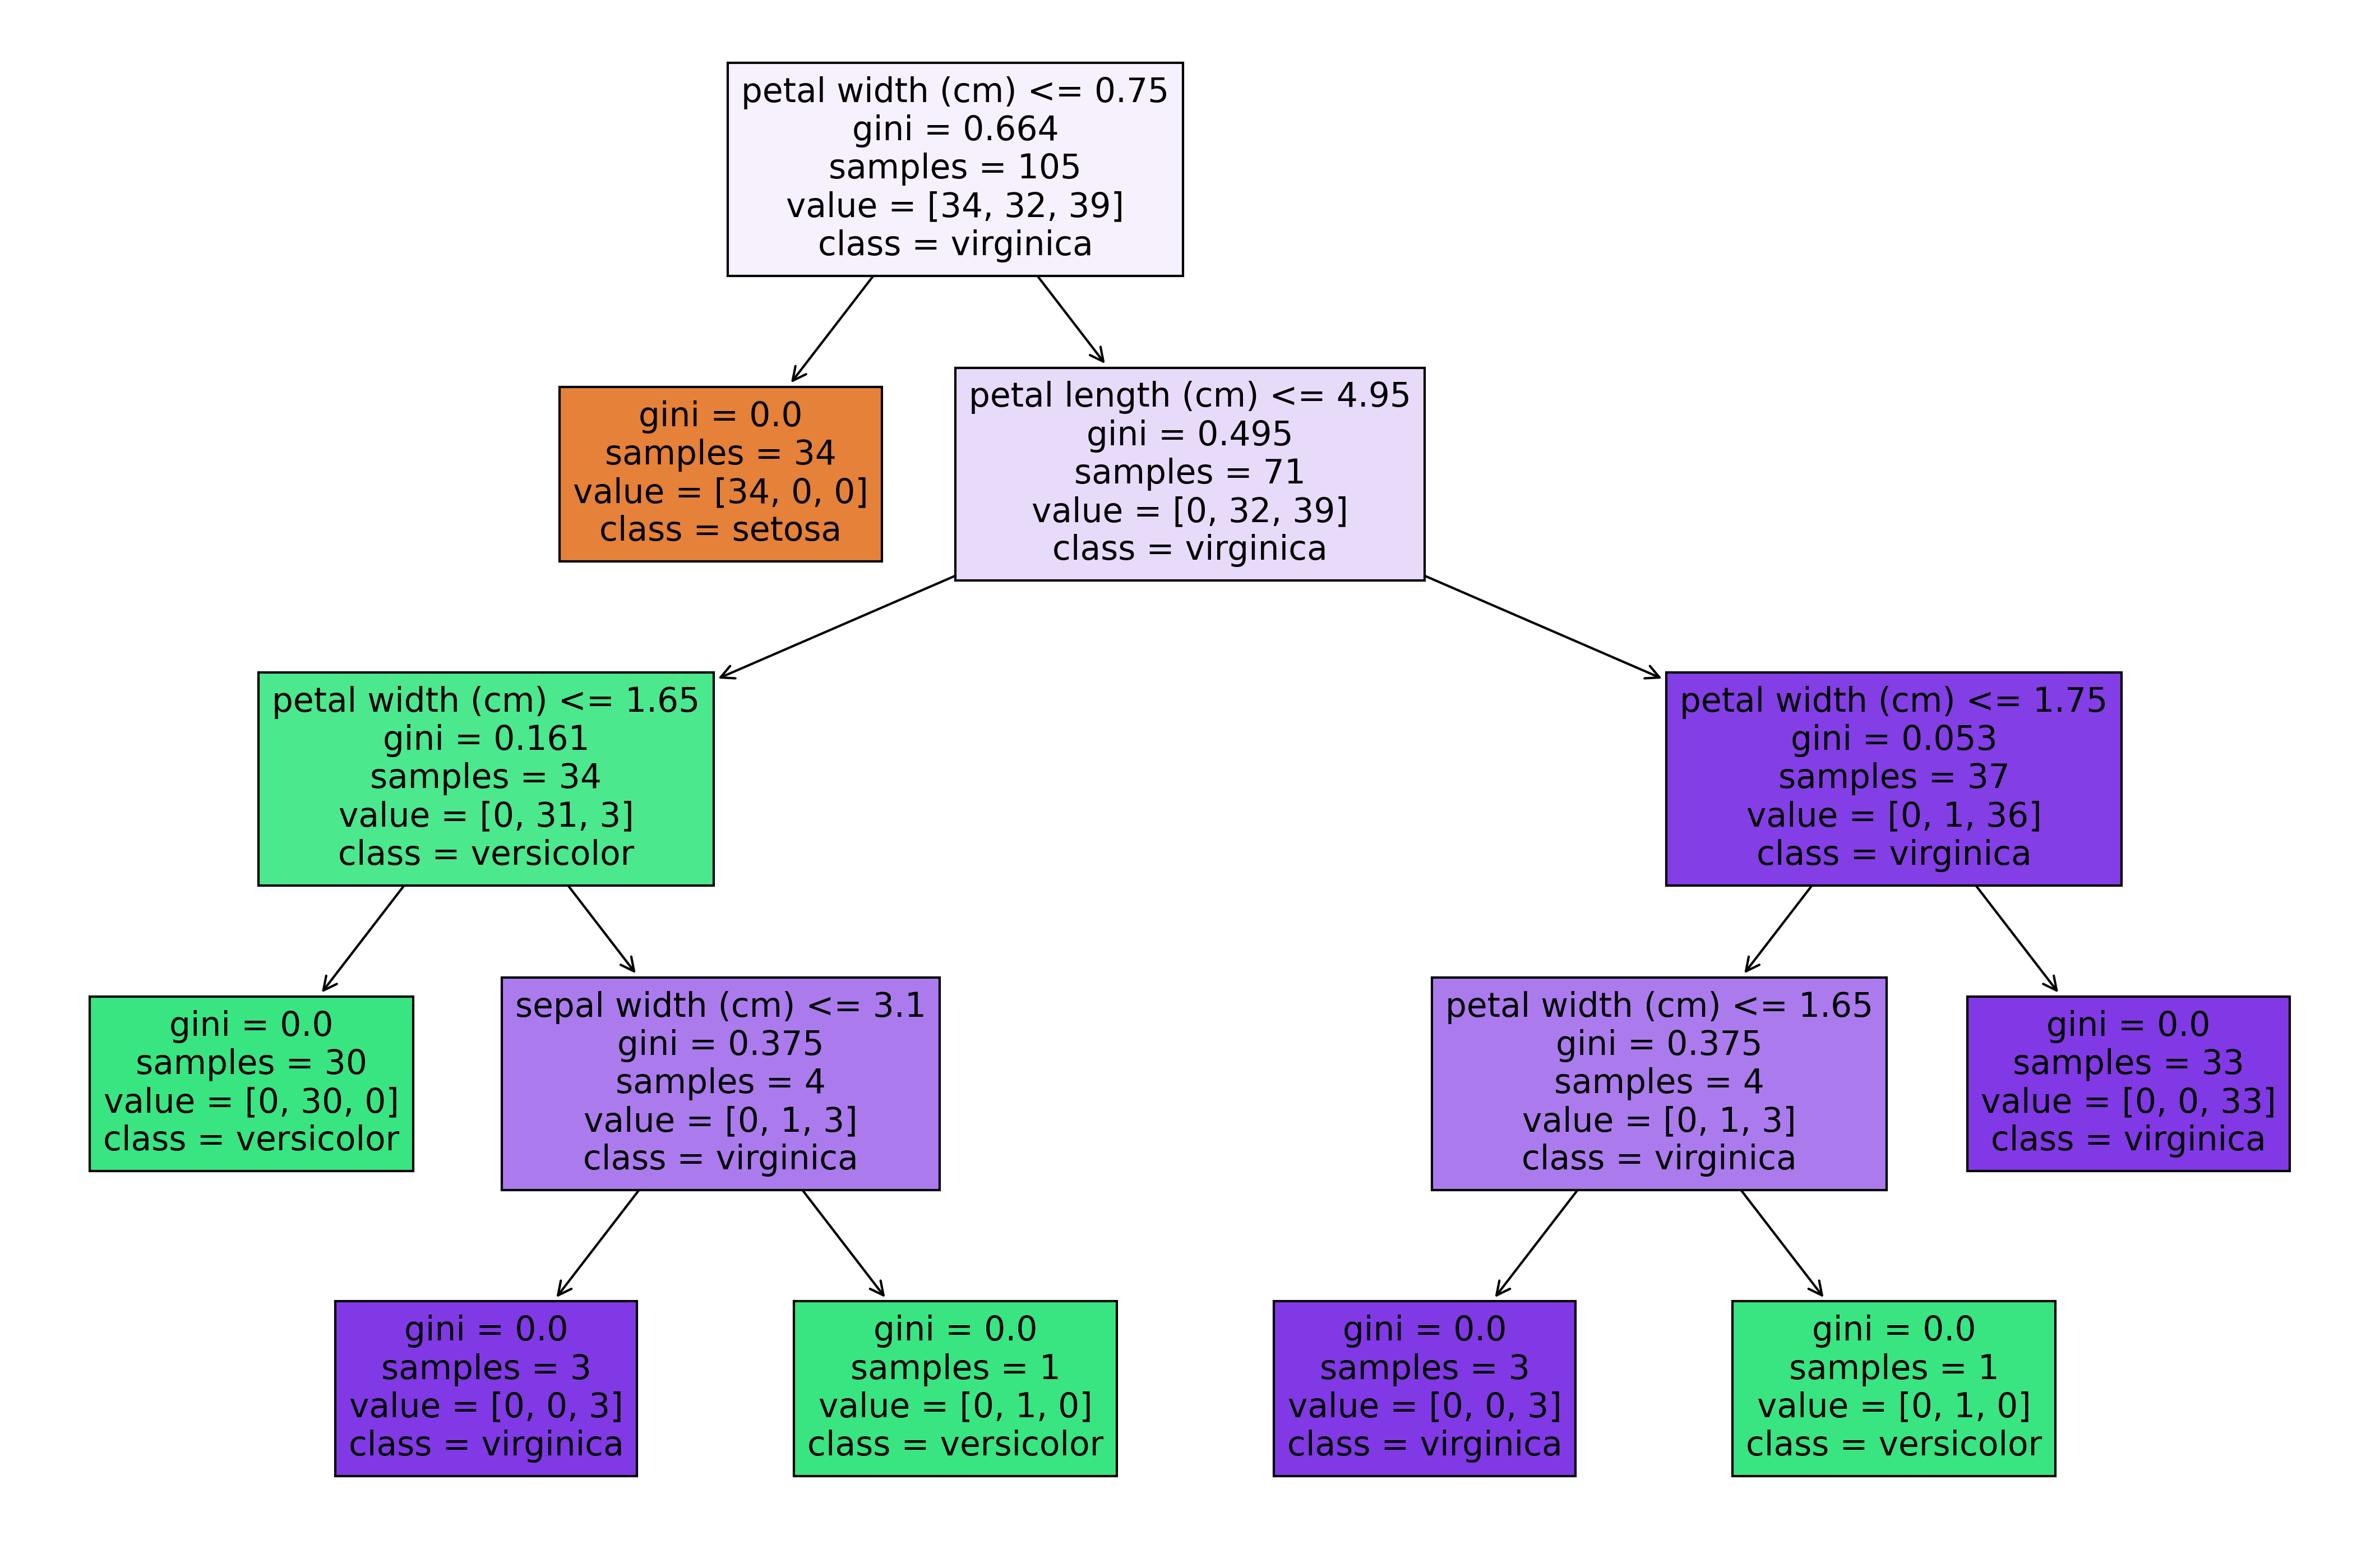

In [41]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (18,12), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

If any new dataset is feeded to this classifer then it would be able to predict the right class accordingly